<h1 style="text-align: center;"><strong>kNN</strong></h1>
<h3 style="text-align: center;">k-Nearest Neighbors</h3>

In [38]:
import numpy as np
from operator import itemgetter
#For visualizing in graph (remove if not implmenting graph)
import matplotlib
import matplotlib.pyplot as plt

EUCLIDEAN DISTANCE:



In [14]:
def heuristic(group,test):
	"""Calculates Euclidean distance of parameters and returns the array of distances."""
	#Euclidean distance (example for 3 parameters):
	#square_root((x2-x1)^2 + (y2-y1)^2 + (z2-z1)^2)
	#similar fashion is considered for more parameters
	temp=group-test #difference of parameters
	temp=temp**2 #square of differences
	dist=temp.sum(axis=1) #sum of differences
	dist=dist**0.5 #Square root of sum
	return dist

In [15]:
def normalize(group):
    """Normalizes the data so we have a uniform set of values over all the parameter.
	Returns the normalized data and Range of dataset before normalisation"""
    minVal=group.min(0) #Minimum value of set
    maxVal=group.max(0) #Maximum value of set
    ranges=maxVal-minVal
    normData=np.zeros(group.shape)
    m=group.shape[0]
	#To normalize the set formula is:
	#(Val[i]-Minimum_val)/(Maximum_value-Minimum_value)
    normData=group-np.tile(minVal,(m,1))
    normData=normData/np.tile(ranges,(m,1))
    return normData,ranges

In [16]:
def createDataset(filename,tupleSize):
	"""Creates 2 matrices from the file given. tupleSize is the number of
	total parameters in the file (including label). 1st matrix contains
	(tupleSize-1) parameters (the actual calcution part), 2nd matrix contains labels"""
	complete_fileMat=fileMatrix(filename,tupleSize)
	training_group=complete_fileMat[...,:tupleSize-1]
	labels=complete_fileMat[...,-1]
	return training_group,labels

In [17]:
def fileMatrix(filename,tupleSize):
	"""Creates a whole matrix from the text file given in the following tuple format:
	param1\tparam2\t...\tparamn\tlabel"""
	fref=open(filename)
	lines=fref.readlines()
	size=len(lines)
	fref.close()
	returnMat=np.zeros((size,tupleSize))
	index=0
	for line in lines:
		line=line.strip()
		temp=line.split('\t')
		returnMat[index,...]=temp[0:tupleSize]
		index += 1
	return returnMat

In [35]:
def kNN(trainingSet,testSet,tupleSize,k):
	"""Returns the prediction on testSet. testSet file does not contain label"""
	group,labels=createDataset(trainingSet,tupleSize)
	group,training_range=normalize(group)
	#GRAPH INITIATION (remove if not implmenting graph)
	fig=plt.figure(figsize=(15, 10))
	ax1=fig.add_subplot(121)
	ax1.set_title('Training Set')
	ax2=fig.add_subplot(122)
	ax2.set_title('Test Set')
	ax1.set_xlabel('Population')
	ax2.set_xlabel('Population')
	ax1.set_ylabel('No. of deaths')
	ax2.set_ylabel('No. of deaths')
	ax1.scatter(group[:,0],group[:,1],15.0*np.array(labels),15.0*np.array(labels))
	#GRAPH INITIATION END
	testMatrix=fileMatrix(testSet,tupleSize-1)
	testMatrix,test_range=normalize(testMatrix)
	resultLabels=np.zeros((testMatrix.shape[0],1))
	index=0
	for testCase in testMatrix:
		distances=heuristic(group,testCase)
		distSortInd=distances.argsort()
		vote={}
		for i in xrange(k):
			candidate=labels[distSortInd[i]]
			vote[candidate]=vote.get(candidate,0)+1
		sortVote=sorted(vote.iteritems(),key=itemgetter(1),reverse=True)
		resultLabels[index]=sortVote[0][0]
		#Add testcase point in testcase graph (remove if not implementing graph)
		ax2.scatter(testCase[0],testCase[1],color='r')
		index += 1
	return resultLabels

In [19]:
def calcError(trainingSet,testSet,tupleSize,k):
	"""Function to check the error rate. Here testSet file contains the labels"""
	result=kNN(trainingSet,testSet,tupleSize,k)
	#print result
	testArr,check=createDataset(testSet,tupleSize)
	error=0.0
	for i in xrange(result.shape[0]):
		if(check[i]!=result[i]):
			error = error + 1.0
			print "Error is: %f  It Should have been: %f"%(result[i],check[i])
	print "Total Errors: %f"%(error)
	print "Error Rate: %f"%(error/testArr.shape[0])

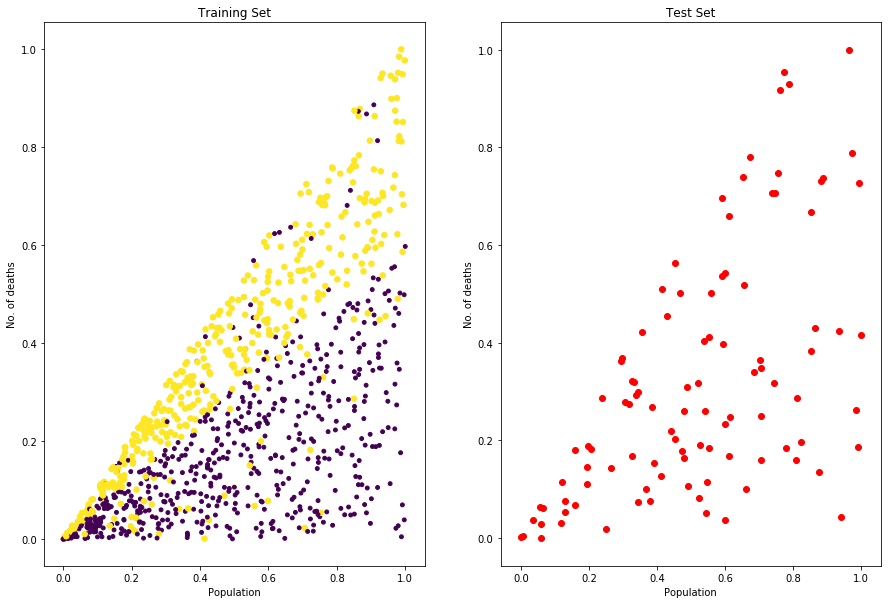

In [37]:
if __name__=='__main__':
	#calcError('Population2Disease.txt','Population2DiseaseError.txt',3,7)
	result=kNN('Population2Disease.txt','Population2DiseaseTesting.txt',3,7)
	#showing graph (remove if not implementing graph)
	plt.show()

In [ ]:
for i in xrange(len(result)):
		print "City no. %d "%(i+1),
		if result[i]==1:
			print "will be affected by disease"
		else:
			print "will not be affected by disease"
	